PROJET : Dashboard d’analyse des ventes (Business Intelligence)

Objectif métier

Aider une entreprise à :

Comprendre l’évolution de ses ventes et bénéfices

Identifier les produits performants et non rentables

Décider où investir et quoi arrêter

1 Données

Données de Kaggle : SuperStore Sales DataSet ( https://www.kaggle.com/datasets/saadharoon27/superstore-dataset)

2 Téléchargement et exploration des données

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df= pd.read_csv("C:/Users/nimat/Desktop/Projets/Projet1/DataSet/SuperStore_Sales_Dataset.csv")
df.head()
#df.info()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


3 Nettoyage et préparation des données
 - Convertir les dates
 - Vérifier les valeurs manquantes
 - Vérifier les doublons

In [72]:
#je garde que les variables qui m'interesse
cols = ['Order ID','Order Date', 'Sales','Profit','Category','Sub-Category',
        'Product Name', 'City', 'Region', 'State', 'Country']

df = df[cols]
#Convertir Order Date en Date avec .to_datetime au format JMA 
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

#création d'une colonne Year, Month et Month en lettre
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Month_name'] = pd.to_datetime(df['Order Date']).dt.month_name()
display(df)

,Order ID,Order Date,Sales,Profit,Category,Sub-Category,Product Name,City,Region,State,Country,Year,Month,Month_name
0,CA-2019-160304,2019-01-01,73.940,28.2668,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",Gaithersburg,East,Maryland,United States,2019,1,January
1,CA-2019-160304,2019-01-02,173.940,38.2668,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",Gaithersburg,East,Maryland,United States,2019,1,January
2,CA-2019-160304,2019-01-02,231.980,67.2742,Technology,Phones,GE 30522EE2,Gaithersburg,East,Maryland,United States,2019,1,January
3,CA-2019-125206,2019-01-03,114.460,28.6150,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,Los Angeles,West,California,United States,2019,1,January
4,US-2019-116365,2019-01-03,30.080,-5.2640,Technology,Accessories,Imation Clip USB flash drive - 8 GB,San Antonio,Central,Texas,United States,2019,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,CA-2020-143259,2020-12-30,213.136,12.1176,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",New York City,East,New York,United States,2020,12,December
5897,CA-2020-115427,2020-12-30,295.904,4.5188,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",Fairfield,West,California,United States,2020,12,December
5898,CA-2020-156720,2020-12-30,388.024,-0.6048,Office Supplies,Fasteners,Bagged Rubber Bands,Loveland,West,Colorado,United States,2020,12,December
5899,CA-2020-143259,2020-12-30,462.776,19.7910,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,New York City,East,New York,United States,2020,12,December


4 Analyse descriptive

Comprendre les données avant de visualiser.

In [45]:
# Ventes Total et bénéfices Total par Category
ventes = round(df.groupby('Category')[['Sales','Profit']].sum(), 2)
display(ventes)


,Sales,Profit
Category,,
Furniture,451508.65,10006.61
Office Supplies,643707.69,74797.25
Technology,470587.99,90458.25


In [58]:
# Ventes Total et bénéfices Total par Sub-Category
ventes_sub = round(df.groupby('Sub-Category')[['Sales','Profit']].sum(), 2)
display(ventes_sub)


,Sales,Profit
Sub-Category,,
Accessories,122301.09,25336.65
Appliances,80305.25,13166.61
Art,50762.98,3635.93
Binders,174978.39,17885.38
Bookcases,57577.69,-342.89
Chairs,181946.00,13406.70
Copiers,59735.80,42774.58
Envelopes,16542.46,3508.51
Fasteners,15205.24,598.42


In [80]:
#Top 10 des villes par bénéfices
top_villes = df.groupby('City')['Profit'].sum()
top_villes.nlargest(10)


City
New York City    34760.2974
Los Angeles      19174.9301
Seattle          18839.3111
Detroit          10803.1896
San Francisco    10475.5284
Lafayette         9772.8078
Jackson           6388.0094
Newark            6042.2924
Columbus          4818.0624
Providence        4353.5854
Name: Profit, dtype: float64

In [81]:
top_villes.nsmallest(10)

City
Philadelphia   -8065.9684
Lancaster      -7207.3791
Houston        -7197.7160
Chicago        -6497.3566
Burlington     -4814.8042
Louisville     -2338.8303
Phoenix        -2054.4460
Dallas         -1983.7422
Memphis        -1466.4888
Aurora         -1444.8620
Name: Profit, dtype: float64

5 Visualisation

visualiser l'évolution des ventes & bénéfices

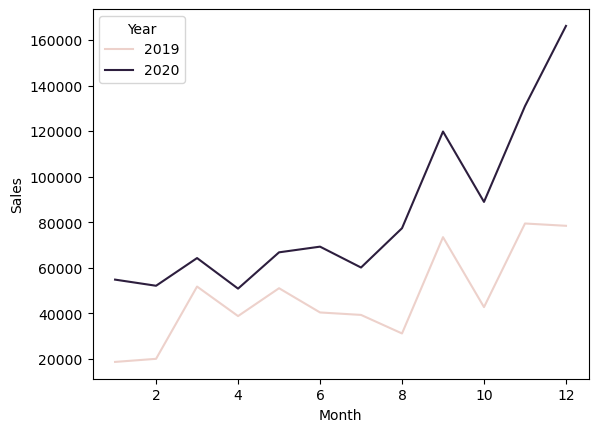

In [55]:
#courbes des ventes par mois/an
ventes = df.groupby(['Year','Month'])[['Sales']].sum().reset_index()
# regroupe 
sns.lineplot(data=ventes, x='Month', y='Sales', hue='Year')
plt.show()

La courbe représentate les ventes mensuelles pour chaque années.
Les ventes sont faibles dans cette période de février en août.
le pic en décembre est plus marqué en 2020 qu'en 2019, cette augmentation s'explique par les promotions, fêtes ou les vacances.
Pour resumé, les ventes 

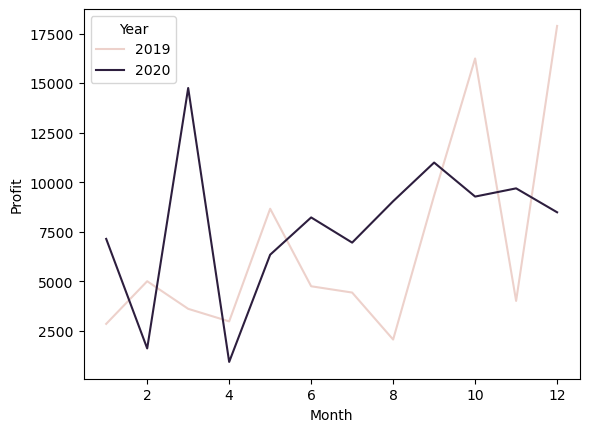

In [56]:
#courbes des bénéfices par mois/an
benefices = df.groupby(['Year','Month'])[['Profit']].sum().reset_index()
# regroupe 
sns.lineplot(data=benefices, x='Month', y='Profit', hue='Year')
plt.show()

L'axe des X correspond aux mois et l'axes des Y au bénéfice en dollars.
L'année 2020 présente globalement plus de ventes que 2019.
En mars 2020, les bénéfices ont augmenter de façons inhabituelle.

